# Лабораторная работа №5
# Рекурсия. Фракталы.

## Выполнил студент группы БФИ2001 Марков Артур
***

### Задание:
Реализовать генерацию заданного типа фрактала с применением рекурсивных функций.


Добавить возможность задания глубины фрактала. 


Оценить глубину рекурсии. 


Построить таблицу зависимости времени построения от глубины фрактала.

### Список фракталов:

Кривая Коха
| Кривая Гильберта
| Кривая Серпинского
| Салфетка Серпинского
| Ковер Серпинского
| Дерево Пифагора 

### Выполнение:

In [125]:
import turtle
import time
import math

def fractal_steps(fractal, distance, max_depth, doneTurtle = False):
    turtle.speed(0)
    for i in range(1, max_depth + 1):
        turtle.reset()
        turtle.speed(0)
        start_time = time.time()
        fractal(distance, i)
        print(f"Depth: {i} - {round(time.time() - start_time)}s")
    if doneTurtle: turtle.done()
    #screen = turtle.Screen()
    #screen.exitonclick() 

In [126]:
#Кривая Коха

def koch_curve(distance, depth):
    if depth == 0:        
        turtle.forward(distance)
        return                  
    koch_curve(distance/3, depth-1)
    turtle.left(60)
    koch_curve(distance/3, depth-1)
    turtle.right(120)
    koch_curve(distance/3, depth-1)
    turtle.left(60)
    koch_curve(distance/3, depth-1)

distance = 400
depth = 4

#start_time = time.time()
#turtle.speed(0)
#koch_curve(distance, depth)
fractal_steps(koch_curve, distance, depth)
#print("--- {0} ms ---".format(round((time.time() - start_time)*1000)))

#screen = turtle.Screen()
#screen.exitonclick() 

Depth: 1 - 0s
Depth: 2 - 0s
Depth: 3 - 2s
Depth: 4 - 8s


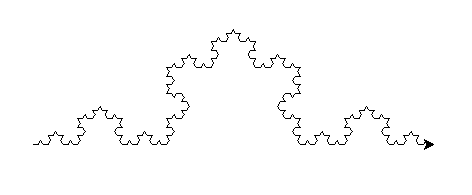

In [128]:
#Кривая Гильберта

def hilbert_curve(distance, depth, angle=90):
    
    if depth == 0:
        return
  
    turtle.left(angle)
    hilbert_curve(distance, depth-1, -angle)
  
    turtle.forward(distance)
    turtle.right(angle)
    hilbert_curve(distance, depth-1, angle)
  
    turtle.forward(distance)
    hilbert_curve(distance, depth-1, angle)

    turtle.right(angle)
    turtle.forward(distance)
    hilbert_curve(distance, depth-1, -angle)
    turtle.left(angle)

distance = 400
depth = 4

#hilbert_curve(distance/(2**depth), depth, 90)

fractal_steps(hilbert_curve, distance, depth)

Depth: 1 - 0s
Depth: 2 - 1s
Depth: 3 - 2s
Depth: 4 - 9s


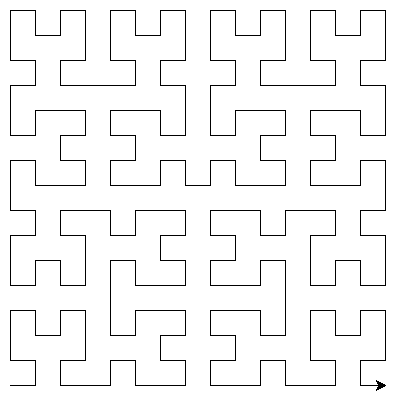

In [129]:
#Кривая Серпинского

def half_sierpinski(distance, depth):
    if depth == 0: 
        turtle.forward(distance)
        return
    half_sierpinski(distance, depth - 1)
    turtle.left(45)
    turtle.forward(distance*math.sqrt(2)) 
    turtle.left(45)
    half_sierpinski(distance, depth - 1)
    turtle.right(90)
    turtle.forward(distance)
    turtle.right(90)
    half_sierpinski(distance, depth - 1)
    turtle.left(45)
    turtle.forward(distance*math.sqrt(2)) 
    turtle.left(45)
    half_sierpinski(distance, depth - 1)

def sierpinski_curve(distance, depth):
    #turtle.right(45)
    half_sierpinski(distance, depth)
    turtle.right(90)
    turtle.forward(distance)
    turtle.right(90)
    half_sierpinski(distance, depth)
    turtle.right(90)
    turtle.forward(distance)
    turtle.right(90)
    
distance = 10
depth = 4

#sierpinski_curve(distance, depth)

fractal_steps(sierpinski_curve, distance, depth)

Depth: 1 - 1s
Depth: 2 - 2s
Depth: 3 - 8s
Depth: 4 - 32s


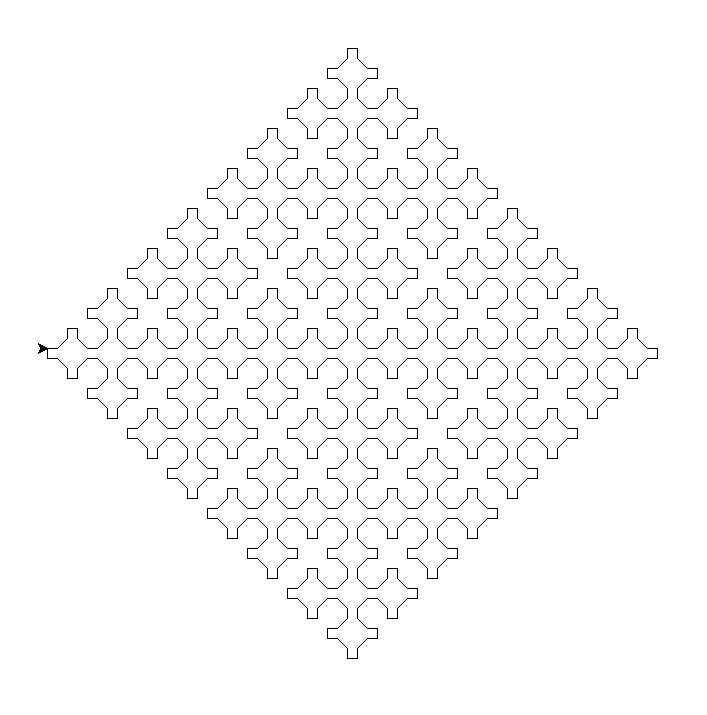

In [130]:
#Салфетка Серпинского / Треугольник

def sierpinski_triangle(distance,depth):
    if depth==0:
        for i in range(0,3):
            turtle.forward(distance)
            turtle.left(120)
    else:
        sierpinski_triangle(distance/2,depth-1)
        turtle.forward(distance/2)
        sierpinski_triangle(distance/2,depth-1)
        turtle.backward(distance/2)
        turtle.left(60)
        turtle.forward(distance/2)
        turtle.right(60)
        sierpinski_triangle(distance/2,depth-1)
        turtle.left(60)
        turtle.backward(distance/2)
        turtle.right(60)    

distance = 500
depth = 4

turtle.speed(0)
start_time = time.time()
#sierpinski_triangle(distance, depth)

fractal_steps(sierpinski_triangle, distance, depth)


Depth: 1 - 0s
Depth: 2 - 1s
Depth: 3 - 4s
Depth: 4 - 13s


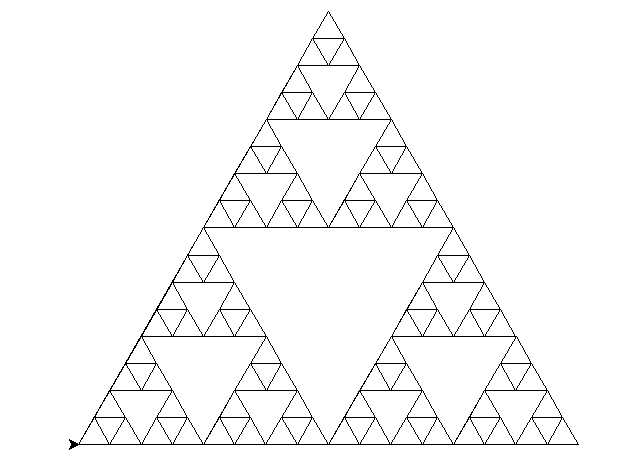

In [131]:
#Ковер Серпинского

def sierpinski_carpet(distance, depth):
    if depth == 0: return
    if depth == 1: turtle.begin_fill()
    for i in range(4):
        for i in range(2):
            sierpinski_carpet(distance / 3, depth - 1)
            turtle.forward(distance)
        turtle.forward(distance)
        turtle.right(90)
    if depth == 1: turtle.end_fill()
        
distance = 70
depth = 3

#sierpinski_carpet(distance, depth)
fractal_steps(sierpinski_carpet, distance, depth)


Depth: 1 - 0s
Depth: 2 - 3s
Depth: 3 - 21s


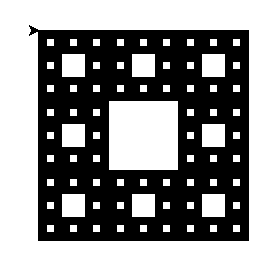

In [134]:
#Дерево Пифагора

def pythagoras_tree_iter(distance, depth, dir = 1):
    if depth == 0: return
    next_dist = math.sqrt((distance ** 2) / 2) 
    turtle.forward(distance)
    if depth > 1:
        turtle.left(45 * dir)
        pythagoras_tree_iter(next_dist, depth - 1, dir)
        turtle.left(135 * dir)
        turtle.forward(distance)
        turtle.left(45 * dir)
        pythagoras_tree_iter(next_dist, depth - 1, -dir)
        turtle.right(45 * dir)
        turtle.forward(distance)
    else:
        turtle.right(90 * dir)
        turtle.forward(distance)
        turtle.right(90 * dir)
        turtle.forward(distance)
    turtle.right(90 * dir)
    turtle.forward(distance)


def pythagoras_tree(distance, depth):
    turtle.left(90)
    pythagoras_tree_iter(distance, depth)
    
distance = 120
depth = 5

#pythagoras_tree(distance, depth)
fractal_steps(pythagoras_tree, distance, depth)


Depth: 1 - 0s
Depth: 2 - 0s
Depth: 3 - 1s
Depth: 4 - 2s
Depth: 5 - 4s


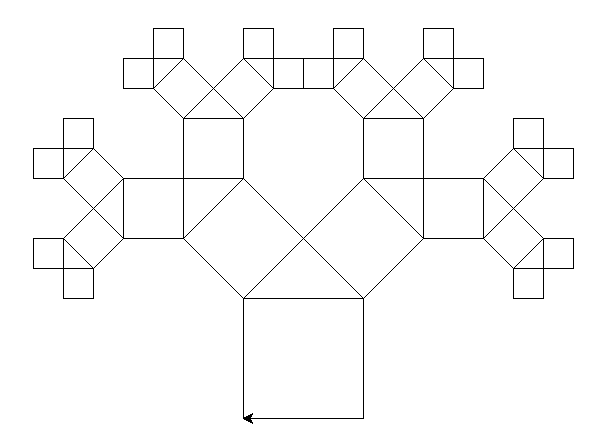

### Вывод

Реализованы генерации 6 фракталов